[B5] Implement K-Means clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.

1. Import Libraries

In [92]:
# Importing necessary libraries
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.preprocessing import StandardScaler  # For data scaling

2. Load and Explore the Dataset

In [93]:
# Loading the dataset
# Loading the dataset with specified encoding 
#The UnicodeDecodeError usually occurs when reading a file with encoding that isn’t UTF-8. 
#To solve this, you can specify a different encoding in the read_csv function, such as ISO-8859-1 or latin1,
#which are commonly used for CSV files with special characters
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
print(data.head())  # Display the first few rows of the dataset to understand its structure

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

3. Preprocess the Data

In [94]:
# Select relevant numerical features for clustering
# Adjust the feature names based on the actual columns in your dataset
features = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']] 

In [95]:
# Scale the features to standardize the range
scaler = StandardScaler()                # Create a scaler object
scaled_features = scaler.fit_transform(features) # Fit and transform the features

4. Determine Optimal Number of Clusters (Elbow Method)

In [96]:
# Initialize an empty list to store inertia values
inertia = []

# Define a range of k values to test
K = range(1, 11)  # Testing for 1 to 10 clusters
# Loop through each k value to calculate inertia
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42) # Create a KMeans instance with k clusters
    kmeans.fit(scaled_features)                      # Fit the model to the scaled features
    inertia.append(kmeans.inertia_)                 # Append the inertia value to the list

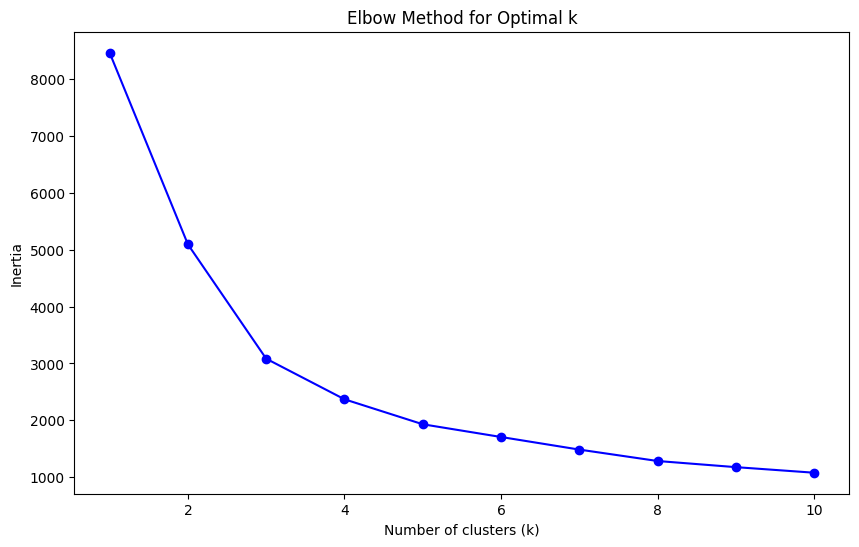

In [97]:
# Plot the elbow curve to visualize the inertia values
plt.figure(figsize=(10, 6))                         # Set the figure size
plt.plot(K, inertia, 'bo-')                         # Plot k vs. inertia
plt.xlabel('Number of clusters (k)')                # Label for x-axis
plt.ylabel('Inertia')                               # Label for y-axis
plt.title('Elbow Method for Optimal k')            # Title of the plot
plt.show()                                         # Display the plot

5. Fit K-Means Model with Optimal Number of Clusters

In [98]:
# Based on the elbow plot, choose the optimal number of clusters
optimal_k = 3  # Replace with the chosen number from the elbow method

# Create a KMeans instance with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the scaled features
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [99]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_                 # Assign cluster labels to each data point

# Display the dataset with the new cluster labels
print(data[['Cluster'] + features.columns.tolist()])

      Cluster    SALES  QUANTITYORDERED  PRICEEACH
0           2  2871.00               30      95.70
1           2  2765.90               34      81.35
2           1  3884.34               41      94.74
3           1  3746.70               45      83.26
4           1  5205.27               49     100.00
...       ...      ...              ...        ...
2818        2  2244.40               20     100.00
2819        2  3978.51               29     100.00
2820        1  5417.57               43     100.00
2821        0  2116.16               34      62.24
2822        0  3079.44               47      65.52

[2823 rows x 4 columns]
